In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
votes=pd.read_csv("/content/114_congress.csv")
votes.head(10)

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,Blumenthal,D,CT,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
6,Blunt,R,MO,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
7,Booker,D,NJ,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
8,Boozman,R,AR,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
9,Boxer,D,CA,0.5,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


In [ ]:
votes.columns

Index(['name', 'party', 'state', '00001', '00004', '00005', '00006', '00007',
       '00008', '00009', '00010', '00020', '00026', '00032', '00038', '00039',
       '00044', '00047'],
      dtype='object')

In [ ]:
votes.shape[0]

100

In [ ]:
ct=votes['party'].value_counts()
ct.to_frame()

,count
party,
R,54
D,44
I,2


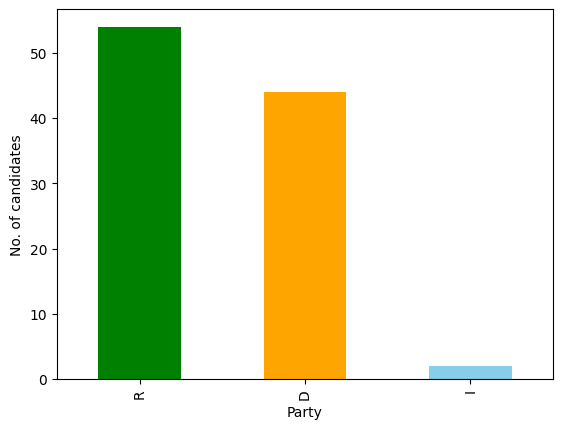

In [ ]:
ct.plot(kind='bar',color=['g','orange','skyblue'])
plt.xlabel('Party')
plt.ylabel("No. of candidates")
plt.show()

In [ ]:
import numpy as np
votes.select_dtypes(include=np.number).mean()

,0
00001,0.325
00004,0.575
00005,0.535
00006,0.945
00007,0.545
00008,0.415
00009,0.545
00010,0.985
00020,0.525
00026,0.545


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
distance=euclidean_distances(votes.iloc[0,3:].values.reshape(1,-1),votes.iloc[1,3:].values.reshape(1,-1))
distance

array([[1.73205081]])

In [ ]:
from sklearn.cluster import KMeans
kmeans_model=KMeans(n_clusters=2,random_state=1)
senator_distances=kmeans_model.fit_transform(votes.iloc[:,3:])
labels=kmeans_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
votes['distance_cluster1']=senator_distances[:,0]
votes['distance_cluster2']=senator_distances[:,1]
votes['labels']=labels

In [ ]:
votes.head()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,...,00020,00026,00032,00038,00039,00044,00047,distance_cluster1,distance_cluster2,labels
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.313478,3.121416,0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.053400,2.614625,0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,3.416517,0.339607,1
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.241984,3.420048,0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.968660,1.438340,1


In [ ]:
pd.crosstab(labels,votes['party'])

party,D,I,R
row_0,,,
0,3,0,54
1,41,2,0


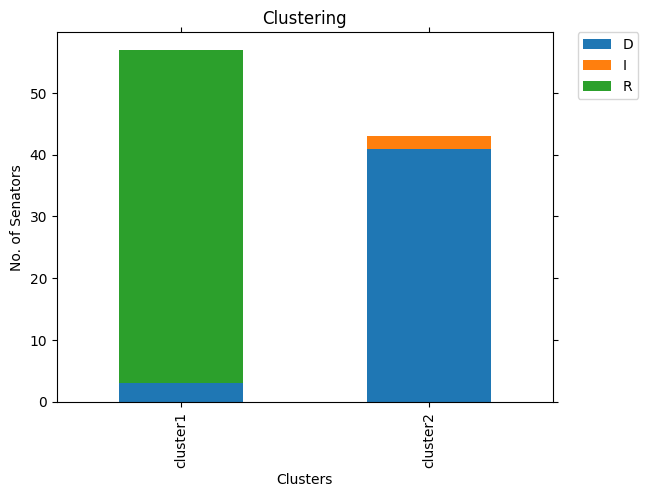

In [ ]:
pd.crosstab(labels,votes['party']).plot(kind='bar',stacked=True)
x=[0,1]
l=['cluster1','cluster2']
plt.xticks(x,l)
plt.title('Clustering')
plt.xlabel('Clusters')
plt.ylabel('No. of Senators')
plt.tick_params(bottom='off',top='off',right='off',left='off')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
democratic_outlier=votes[(labels==1) & (votes['party']=='D')]
democratic_outlier[['name','party']]

,name,party
2,Baldwin,D
4,Bennet,D
5,Blumenthal,D
7,Booker,D
9,Boxer,D
10,Brown,D
12,Cantwell,D
14,Cardin,D
15,Carper,D
16,Casey,D


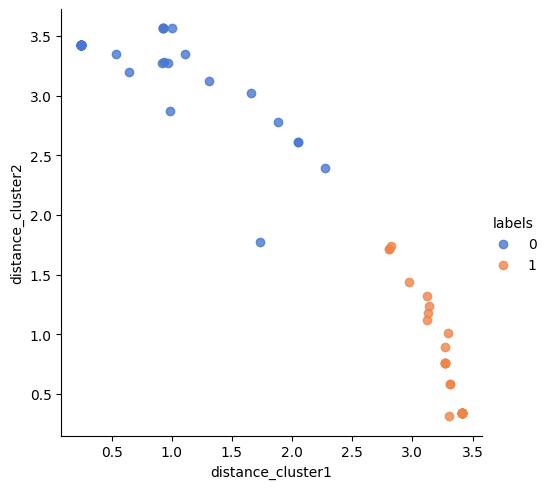

In [ ]:
sns.lmplot(x='distance_cluster1',y='distance_cluster2',hue='labels',data=votes,fit_reg=False,palette='muted')

In [ ]:
extremism = (senator_distances ** 3).sum(axis=1)
votes['extremism']=extremism
votes.sort_values('extremism',inplace=True,ascending=False)

In [ ]:
votes[['name','party','extremism']].head(5)

,name,party,extremism
98,Wicker,R,46.250476
53,Lankford,R,46.046873
69,Paul,R,46.046873
80,Sasse,R,46.046873
26,Cruz,R,46.046873
